In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from ipynb.fs.full.jean.common._3factorize import appls

ipynb.fs.full.jean.common._2dual_status:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
ipynb.fs.full.jean.common._2dual_status:17: SettingWith

In [2]:
appls.head()

,Numer dokumentu,Data złożenia,Data zamknięcia,Student,Tryb studiów,Typ studiów,Język wykładowy,Kierunek,Status,Rodzaj wniosku,...,Informacje o pracach dyplomowych,Stopień zaawansowania pracy,Słowo rodzin lub famil w uzasadnieniu,Słowo zdrow lub health w uzasadnieniu,Słowo bardzo proszę w uzasadnieniu,Słowo losow w uzasadnieniu,Słowo prac lub work w uzasadnieniu,Słowo obiecuję lub promise w uzasadnieniu,Słowo zobowiązuję w uzasadnieniu,month
0,565,2017-10-13 09:26:00,2017-10-14 08:56:00,2121.0,1493.0,1650.0,1878.0,1770.0,1,2118.0,...,NaN,NaN,0,0,0,0,1,0,0,10
1,111,2017-09-15 17:02:00,2017-09-19 16:05:00,2717.0,2175.0,1650.0,1878.0,1785.0,0,1888.0,...,NaN,NaN,1,1,0,0,0,0,0,9
2,294,2017-09-18 22:57:00,2017-09-19 16:27:00,1539.0,2175.0,1650.0,1878.0,1780.0,1,1888.0,...,NaN,NaN,0,0,0,0,0,0,0,9
3,13,2017-09-14 10:16:00,2017-09-15 13:38:00,2746.0,1493.0,1650.0,1878.0,1766.0,1,1888.0,...,NaN,NaN,0,0,0,0,1,0,0,9
4,301,2017-09-18 23:29:00,2017-09-19 16:29:00,1554.0,2175.0,1650.0,1878.0,1785.0,1,1888.0,...,NaN,NaN,0,0,0,0,0,0,0,9


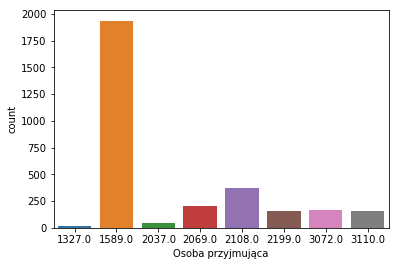

In [3]:
MIN_PROCESSED = 10
filter_outliers = lambda g: g['Status'].count() > MIN_PROCESSED
group = lambda df: df.groupby('Osoba przyjmująca')
filter_out = lambda df: group(df).filter(filter_outliers)
relevant = filter_out(appls)

sns.countplot(relevant['Osoba przyjmująca'])

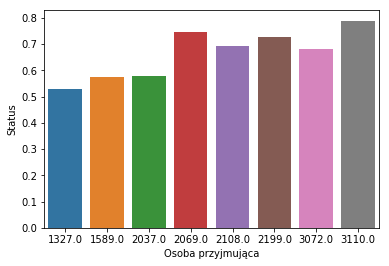

In [4]:
count_per_person = lambda df: group(df)['Status'].count() 
accepted_ratio = count_per_person(relevant[relevant['Status'] == 1]) / count_per_person(relevant)

plot = sns.barplot(x=accepted_ratio.index, y=accepted_ratio)

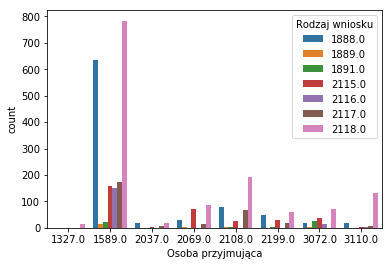

In [5]:
sns.countplot(x='Osoba przyjmująca', hue='Rodzaj wniosku', data=relevant)